# ResBaz: Building a Neural Network!


## Exercise 1: Simple Regression example (30 minutes)

Below is a dataset that describes the median house value for California districts. Each data sample is a census block group, which has 8 features which describe something about the block group, these are:

- MedInc: median income in block group
- HouseAge: median house age in block group
- AveRooms: average number of rooms per household
- AveBedrms: average number of bedrooms per household
- Population: block group population
- AveOccup: average number of household members
- Latitude: block group latitude
- Longitude: block group longitude

For each of these data samples there is also the actual median house value in USD 100,000 of each block group.

Your task is to build a neural network that is able to predict the median house value using the 'MedInc' and 'HouseAge' features. Your network should have one hidden layer, with seven neurons in the hidden layer.

### Task 1:
Our first task is to go through a single forward pass, then calculate the Loss and then run through a single backward pass.

In [16]:
# Load in relevant modules:

import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd

# California housing data from sklearn:

housing = fetch_california_housing() # dictionary object

print(housing.data.shape, housing.target.shape)
print(housing.feature_names)

# Features:
X = housing.data[:,0:2]
# Targets:
Y = housing.target.reshape(-1,1)

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


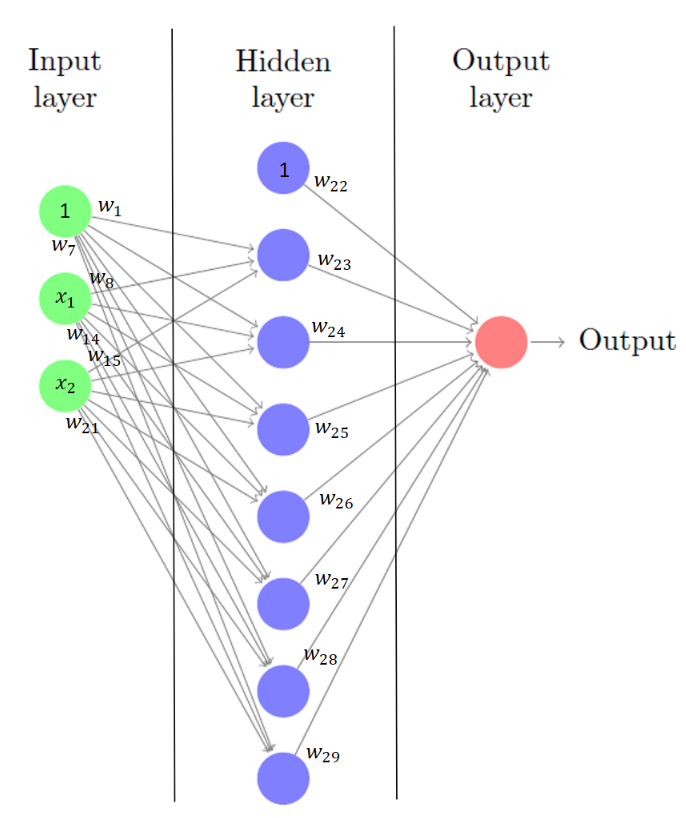

In [17]:
from IPython.display import Image
image_path = "NN_Task_1_diagram.png"
Image(filename=image_path)

* We first must choose the split between train_data and test_data. 

* We can use the train_test_split function from the sklearn module. 

In [18]:
from sklearn.model_selection import train_test_split
# Cut the data up randomly to a training (80%) and test set (20%):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

* Scale the data:

In [19]:
# Scale the data so that it has zero mean and unit variance:
X_mean, X_std = (np.mean(X_train, axis=0), np.std(X_train, axis=0))
x = (X - X_mean) / X_std

Y_mean, Y_std = (np.mean(Y_train), np.std(Y_train))
y = (Y - Y_mean) / Y_std

In [20]:
# Let's define some variables for the number of inputs and outputs.
N, D_in = x.shape
N, D_out = y.shape
H = 7 # The number of neurons in the hidden layer.

* We define our Sigmoid activation function (use one from scipy module):
$$
\frac{1}{1+e^{-x}}
$$

In [36]:
from scipy.special import expit

In [37]:
def Sigmoid_plot():
    x = np.linspace(-6, 6, 1000)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot(x, expit(x), c='k', lw=2)
    ax.set_xlim(*x[[0, -1]])
    ax.axvline(0, c="#666666", ls=":", zorder=-1, lw=1)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$S(x)$")
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(5))
    fig.tight_layout()

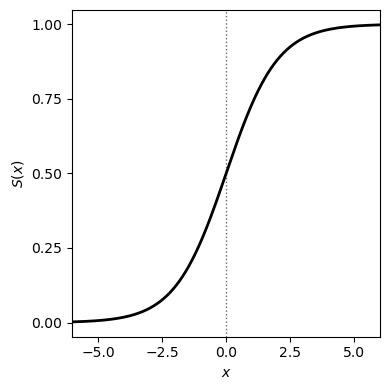

In [38]:
# Plot function:
Sigmoid_plot()

Let's now draw our weights from a normal distribution with mean 0 and std 1, such that:
$$
w \sim \mathcal{N}(0,1)
$$

In [39]:
# Define the x range and normal distribution function
def Normal_plot():
    x = np.linspace(-6, 6, 1000)
    normal = lambda x: (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

    # Create the plot
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot(x, normal(x), c='k', lw=2)

    # Configure plot
    ax.set_xlim(*x[[0, -1]])
    ax.axvline(0, c="#666666", ls=":", zorder=-1, lw=1)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$N(x)$")
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_major_locator(MaxNLocator(5))
    fig.tight_layout()

    plt.show()

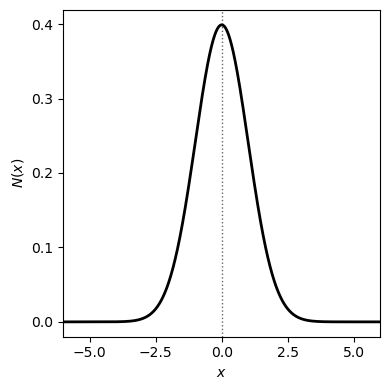

In [40]:
# Plot function:
Normal_plot()


In [41]:
# Weights for the bias terms in the hidden layer:
w1, w2, w3, w4, w5, w6, w7 = np.random.randn(H) 
# Weights for x1 to all neurons.
w8, w9, w10, w11, w12, w13, w14 = np.random.randn(H)
# Weights for x2 to all neurons.
w15, w16, w17, w18, w19, w20, w21 = np.random.randn(H)
# Weights for hidden layer outputs to output neuron.
w22, w23, w24, w25, w26, w27, w28, w29 = np.random.randn(H + 1)

We are ready to do a forward pass, remember:

The inputs and outputs for each neuron in the hidden layer are:

$$
\begin{aligned}
& \alpha_{H 1}=w_1+x_1 w_8+x_2 w_{15} \\
& \beta_{H 1}=f\left(\alpha_{H 1}\right) \\
& \alpha_{H 2}=w_2+x_1 w_9+x_2 w_{16} \\
& \beta_{H 2}=f\left(\alpha_{H 2}\right) \\
& \alpha_{H 3}=w_3+x_1 w_{10}+x_2 w_{17} \\
& \beta_{H 3}=f\left(\alpha_{H 3}\right) \\
& \alpha_{H 4}=w_4+x_1 w_{11}+x_2 w_{18} \\
& \beta_{H 4}=f\left(\alpha_{H 4}\right) \\
& \alpha_{H 5}=w_5+x_1 w_{12}+x_2 w_{19} \\
& \beta_{H 5}=f\left(\alpha_{H 5}\right)\\
& \alpha_{H 6}=w_6+x_1 w_{13}+x_2 w_{20} \\
& \beta_{H 6}=f\left(\alpha_{H 6}\right)\\
& \alpha_{H 7}=w_7+x_1 w_{14}+x_2 w_{21} \\
& \beta_{H 7}=f\left(\alpha_{H 7}\right)\\
\end{aligned}
$$

and for the output layer:


$$
\begin{aligned}
& \alpha_{O 1}=w_{22}+\beta_{H 1} w_{23}+\beta_{H 2} w_{24}+\beta_{H 3} w_{25}+\beta_{H 4} w_{26}+\beta_{H 5} w_{27}+\beta_{H 6} w_{28}+\beta_{H 7} w_{29} \\
& \beta_{O 1}=f\left(\alpha_{O 1}\right)
\end{aligned}
$$

, where $\beta_{O 1}$ is also known as $y_{pred}$.

**Exercise** (5 minutes):
* It is time to do perform a forward pass!

In [47]:
# Let's code up our neural network! A Forward pass:

# Potentially matrix multiplication should be used ... I will give you a headstart:

# Hidden layer:

hidden_layer_inputs = np.hstack([np.ones((N, 1)),x])
hidden_layer_weights = np.array([
    [w1, w2, w3, w4, w5, w6, w7],
    [w8, w9, w10, w11, w12, w13, w14],
    [w15, w16, w17, w18, w19, w20, w21]
])

# alpha bits:...

hidden_layer_sums = hidden_layer_inputs @ hidden_layer_weights

# beta bits:...

hidden_layer_outputs = expit(hidden_layer_sums)

# Output layer:...

output_layer_inputs = np.hstack([np.ones((N, 1)),hidden_layer_outputs])
output_layer_weights = np.array([[w22, w23, w24, w25, w26, w27, w28, w29]]).T
output_layer_sums = output_layer_inputs @ output_layer_weights
y_pred = expit(output_layer_sums)

# Prediction:
print('We have predictions:')
print(y_pred)

We have predictions:
[[0.49097137]
 [0.52461946]
 [0.58405829]
 ...
 [0.74454717]
 [0.73421139]
 [0.73189923]]


Here we have initialised our weights randomly and completed our first forward pass through the network, where we are using the inputs and the randomised weights to make predictions $\boldsymbol{y}_{\text {pred }}$ for classification. These initial predictions will not be very good because our weights were randomly chosen. Indeed, the initial loss $L$
$$
L=\frac{1}{2} \sum_i^N\left(y_i-y_{\text {pred }, i}\right)^2
$$

**Exercise** (2 minutes):
* Calculate out initial loss $L$

In [48]:
# Calculate our loss function (the total error in our predictions compared to the target):...

loss = 0.5 * np.sum((y_pred - y)**2)

print(f"Initial loss: {loss:.0e}")

Initial loss: 2e+04


We are ready to now perform a backward pass, remember:

We know from the chain rule is
$$
\frac{\partial E}{\partial w_{j}}=\frac{\partial E}{\partial \beta_{O 1}} \frac{\partial \beta_{O 1}}{\partial \alpha_{O 1}} \frac{\partial \alpha_{O 1}}{\partial w_{j}},
$$
where $w_j = (w_{22}, w_{23}, w_{24}, w_{25}, w_{26}, w_{27}, w_{28}, w_{29})$. First let us recall that since $y_{\text {pred, } i} \equiv \beta_{O 1, i}$

As:
$$
E=\frac{1}{2} \sum_{i=1}^N\left(y_i-\beta_{O 1, i}\right)^2,
$$
we have that:
$$
\frac{\partial E}{\partial \beta_{O 1}}=-\left(y-\beta_{O 1}\right) .
$$

For the next term recall that
$$
\beta_{O 1}=f\left(\alpha_{O 1}\right),
$$
where $f$ is a sigmoid
$$
\beta_{O 1}=f\left(\alpha_{O 1}\right)=\frac{1}{1+e^{-\alpha_{O 1}}},
$$
such that
$$
\frac{\partial \beta_{O 1}}{\partial \alpha_{O 1}}=\beta_{O 1}\left(1-\beta_{O 1}\right).
$$

And finally,
\begin{aligned}
& \alpha_{O 1}=w_{22}+\beta_{H 1} w_{23}+\beta_{H 2} w_{24}+\beta_{H 3} w_{25}+\beta_{H 4} w_{26}+\beta_{H 5} w_{27}+\beta_{H 6} w_{28}+\beta_{H 7} w_{29},
\end{aligned}
such that for example:
$$
\frac{\partial \alpha_{O 1}}{\partial w_{23}}=\beta_{H 1}.
$$

We know from the chain rule that:
$$
\frac{\partial E}{\partial w_j}=\frac{\partial E}{\partial \beta_{O 1}} \frac{\partial \beta_{O 1}}{\partial \alpha_{O 1}} \frac{\partial \alpha_{O 1}}{\partial \beta_{H k}} \frac{\partial \beta_{H k}}{\partial \alpha_{H k}} \frac{\partial \alpha_{H k}}{\partial w_j}
$$
where $H k = (H 1, H 2,..., H7)$, $w_j = (w_{1}, w_{2}, ..., w_{20}, w_{21})$. k corresponds with j in such a way as to fufill the equations:
\begin{aligned}
& \alpha_{H 1}=w_1+x_1 w_8+x_2 w_{15} \\
& \beta_{H 1}=f\left(\alpha_{H 1}\right) \\
& \alpha_{H 2}=w_2+x_1 w_9+x_2 w_{16} \\
& \beta_{H 2}=f\left(\alpha_{H 2}\right) \\
& \alpha_{H 3}=w_3+x_1 w_{10}+x_2 w_{17} \\
& \beta_{H 3}=f\left(\alpha_{H 3}\right) \\
& \alpha_{H 4}=w_4+x_1 w_{11}+x_2 w_{18} \\
& \beta_{H 4}=f\left(\alpha_{H 4}\right) \\
& \alpha_{H 5}=w_5+x_1 w_{12}+x_2 w_{19} \\
& \beta_{H 5}=f\left(\alpha_{H 5}\right)\\
& \alpha_{H 6}=w_6+x_1 w_{13}+x_2 w_{20} \\
& \beta_{H 6}=f\left(\alpha_{H 6}\right)\\
& \alpha_{H 7}=w_7+x_1 w_{14}+x_2 w_{21} \\
& \beta_{H 7}=f\left(\alpha_{H 7}\right)\\
\end{aligned}

and just like $\frac{\partial \beta_{O 1}}{\partial \alpha_{O 1}}$:
$$
\frac{\partial \beta_{H 1}}{\partial \alpha_{H 1}}=\beta_{H 1}\left(1-\beta_{H 1}\right)
$$
which leads to the final term $\frac{\partial \alpha_{H 1}}{\partial w_1}$ where
$$
\alpha_{H 1}=w_1+x_1 w_8+x_2 w_{15} 
$$
such that
$$
\frac{\partial \alpha_{H 1}}{\partial w_8}=x_1
$$

This process updates estimates for $w_j^{(t+1)}$ as
$$
w_j^{(t+1)}=w_j^{(t)}-\eta \frac{\partial E}{\partial w_j}
$$

Let's start to define the backpropagation step:

You may realise that we have omitted somthing above, this is that the derivatives are missing the sum:
$$
\sum_{i=1}^N.
$$

This is fine though, all we have to do is sum what we get up.

In [53]:
# Let's connect what we have so far from before:
beta_h = hidden_layer_outputs
alpha_h = hidden_layer_sums
beta_o = y_pred
alpha_o = output_layer_sums

**Exercise** (10 minutes):
* Let's derive our derivative in order to perform backpropagation!

In [58]:
# Hidden layer weight derivatives:...

s = (beta_o - y) * beta_o * (1 - beta_o)
dE_dw29 = s * beta_h[:, [6]]
dE_dw28 = s * beta_h[:, [5]]
dE_dw27 = s * beta_h[:, [4]]
dE_dw26 = s * beta_h[:, [3]]
dE_dw25 = s * beta_h[:, [2]]
dE_dw24 = s * beta_h[:, [1]]
dE_dw23 = s * beta_h[:, [0]]
dE_dw22 = s

In [59]:
# Input bias layer weight derivatives:...

dE_dw7 = s * w29 * beta_h[:, [6]] * (1 - beta_h[:, [6]])

dE_dw6 = s * w28 * beta_h[:, [5]] * (1 - beta_h[:, [5]])

dE_dw5 = s * w27 * beta_h[:, [4]] * (1 - beta_h[:, [4]])

dE_dw4 = s * w26 * beta_h[:, [3]] * (1 - beta_h[:, [3]])

dE_dw3 = s * w25 * beta_h[:, [2]] * (1 - beta_h[:, [2]])

dE_dw2 = s * w24 * beta_h[:, [1]] * (1 - beta_h[:, [1]])

dE_dw1 = s * w23 * beta_h[:, [0]] * (1 - beta_h[:, [0]])

In [60]:
# Input x_1 layer weight derivatives...

dE_dw14 = s * w29 * beta_h[:, [6]] * (1 - beta_h[:, [6]]) * x[:, [0]]

dE_dw13 = s * w28 * beta_h[:, [5]] * (1 - beta_h[:, [5]]) * x[:, [0]]

dE_dw12 = s * w27 * beta_h[:, [4]] * (1 - beta_h[:, [4]]) * x[:, [0]]

dE_dw11 = s * w26 * beta_h[:, [3]] * (1 - beta_h[:, [3]]) * x[:, [0]]

dE_dw10 = s * w25 * beta_h[:, [2]] * (1 - beta_h[:, [2]]) * x[:, [0]]

dE_dw9 = s * w24 * beta_h[:, [1]] * (1 - beta_h[:, [1]]) * x[:, [0]]

dE_dw8 = s * w23 * beta_h[:, [0]] * (1 - beta_h[:, [0]]) * x[:, [0]]

In [61]:
# Input x_2 layer weight derivatives...

dE_dw21 = s * w29 * beta_h[:, [6]] * (1 - beta_h[:, [6]]) * x[:, [1]]

dE_dw20 = s * w28 * beta_h[:, [5]] * (1 - beta_h[:, [5]]) * x[:, [1]]

dE_dw19 = s * w27 * beta_h[:, [4]] * (1 - beta_h[:, [4]]) * x[:, [1]]

dE_dw18 = s * w26 * beta_h[:, [3]] * (1 - beta_h[:, [3]]) * x[:, [1]]

dE_dw17 = s * w25 * beta_h[:, [2]] * (1 - beta_h[:, [2]]) * x[:, [1]]

dE_dw16 = s * w24 * beta_h[:, [1]] * (1 - beta_h[:, [1]]) * x[:, [1]]

dE_dw15 = s * w23 * beta_h[:, [0]] * (1 - beta_h[:, [0]]) * x[:, [1]]

In [62]:
# Now update the weights using stochastic gradient descent:
eta = 1e-3
w1 = w1 - eta * np.sum(dE_dw1)
w2 = w2 - eta * np.sum(dE_dw2)
w3 = w3 - eta * np.sum(dE_dw3)
w4 = w4 - eta * np.sum(dE_dw4)
w5 = w5 - eta * np.sum(dE_dw5)
w6 = w6 - eta * np.sum(dE_dw6)
w7 = w7 - eta * np.sum(dE_dw7)
w8 = w8 - eta * np.sum(dE_dw8)
w9 = w9 - eta * np.sum(dE_dw9)
w10 = w10 - eta * np.sum(dE_dw10)
w11 = w11 - eta * np.sum(dE_dw11)
w12 = w12 - eta * np.sum(dE_dw12)
w13 = w13 - eta * np.sum(dE_dw13)
w14 = w14 - eta * np.sum(dE_dw14)
w15 = w15 - eta * np.sum(dE_dw15)
w16 = w16 - eta * np.sum(dE_dw16)
w17 = w17 - eta * np.sum(dE_dw17)
w18 = w18 - eta * np.sum(dE_dw18)
w19 = w19 - eta * np.sum(dE_dw19)
w20 = w20 - eta * np.sum(dE_dw20)
w21 = w21 - eta * np.sum(dE_dw21)
w22 = w22 - eta * np.sum(dE_dw22)
w23 = w23 - eta * np.sum(dE_dw23)
w24 = w24 - eta * np.sum(dE_dw24)
w25 = w25 - eta * np.sum(dE_dw25)
w26 = w26 - eta * np.sum(dE_dw26)
w27 = w27 - eta * np.sum(dE_dw27)
w28 = w28 - eta * np.sum(dE_dw28)
w29 = w29 - eta * np.sum(dE_dw29)

### Task 2

Implement the neural network from Task 1 using numpy. Train the neural network with our training data, and plot the training and test loss as a function of epoch.

We have scaled the training data above, **but**, we must also scale our test data with the same training data mean and std. This is because any test data must follow the same procedure as the training data.

In [65]:

# Apply scale to the test data:
x_test = (X_test - X_mean) / X_std
y_test = (Y_test - Y_mean) / Y_std

**Exercise** (10 minutes):
* Let's now combine all our knowledge together to make a NN. 
* Let's try a learning rate ($\eta$) 1e-3 with 10000 epochs. 
* We can also run a forward pass on our test data each epoch to compute the loss for the test data along with the training data losses.
* It is important to track your Losses, they show if we are converging to the correct spot in parameter space.

In [66]:
# NN:

# Initialise weights:
# Weights for the bias terms in the hidden layer:
w1, w2, w3, w4, w5, w6, w7 = np.random.randn(H) 
# Weights for x1 to all neurons.
w8, w9, w10, w11, w12, w13, w14 = np.random.randn(H)
# Weights for x2 to all neurons.
w15, w16, w17, w18, w19, w20, w21 = np.random.randn(H)
# Weights for hidden layer outputs to output neuron.
w22, w23, w24, w25, w26, w27, w28, w29 = np.random.randn(H + 1)

# Define some terms:
num_epochs = 10000
eta = 1e-6 # 1e-3

# Store losses:
losses = np.empty(num_epochs)

# test losses:
losses2 = np.empty(num_epochs)

# Run through epochs:...
for epoch in range(num_epochs):

    # Forward pass:...

    # Hidden layer:
    hidden_layer_inputs = np.hstack([np.ones((N, 1)),x])
    hidden_layer_weights = np.array([
        [w1, w2, w3, w4, w5, w6, w7],
        [w8, w9, w10, w11, w12, w13, w14],
        [w15, w16, w17, w18, w19, w20, w21]
    ])

    # alpha bits:
    hidden_layer_sums = hidden_layer_inputs @ hidden_layer_weights

    # beta bits:
    hidden_layer_outputs = expit(hidden_layer_sums)

    # Output layer.

    output_layer_inputs = np.hstack([np.ones((N, 1)),hidden_layer_outputs])
    output_layer_weights = np.array([
        [w22, w23, w24, w25, w26, w27, w28, w29]
    ]).T
    output_layer_sums = output_layer_inputs @ output_layer_weights
    y_pred = output_layer_sums # expit(output_layer_sums)
    
    # Compute Loss:
    
    loss = 0.5 * np.sum((y_pred - y)**2)
    
    # Show losses every 100 epochs:
    if not epoch % 100:
        print(epoch, loss)

    # Save losses:
    losses[epoch] = loss


    # Backward pass:...
    
    # Define things nicely:
    beta_h = hidden_layer_outputs
    alpha_h = hidden_layer_sums
    beta_o = y_pred
    alpha_o = output_layer_sums

    # Calculate gradients.
    s = (beta_o - y)  # * beta_o * (1 - beta_o)
    dE_dw29 = s * beta_h[:, [6]]
    dE_dw28 = s * beta_h[:, [5]]
    dE_dw27 = s * beta_h[:, [4]]
    dE_dw26 = s * beta_h[:, [3]]
    dE_dw25 = s * beta_h[:, [2]]
    dE_dw24 = s * beta_h[:, [1]]
    dE_dw23 = s * beta_h[:, [0]]
    dE_dw22 = s

    dE_dw21 = s * w29 * beta_h[:, [6]] * (1 - beta_h[:, [6]]) * x[:, [1]]

    dE_dw20 = s * w28 * beta_h[:, [5]] * (1 - beta_h[:, [5]]) * x[:, [1]]

    dE_dw19 = s * w27 * beta_h[:, [4]] * (1 - beta_h[:, [4]]) * x[:, [1]]

    dE_dw18 = s * w26 * beta_h[:, [3]] * (1 - beta_h[:, [3]]) * x[:, [1]]

    dE_dw17 = s * w25 * beta_h[:, [2]] * (1 - beta_h[:, [2]]) * x[:, [1]]

    dE_dw16 = s * w24 * beta_h[:, [1]] * (1 - beta_h[:, [1]]) * x[:, [1]]

    dE_dw15 = s * w23 * beta_h[:, [0]] * (1 - beta_h[:, [0]]) * x[:, [1]]


    dE_dw14 = s * w29 * beta_h[:, [6]] * (1 - beta_h[:, [6]]) * x[:, [0]]

    dE_dw13 = s * w28 * beta_h[:, [5]] * (1 - beta_h[:, [5]]) * x[:, [0]]

    dE_dw12 = s * w27 * beta_h[:, [4]] * (1 - beta_h[:, [4]]) * x[:, [0]]

    dE_dw11 = s * w26 * beta_h[:, [3]] * (1 - beta_h[:, [3]]) * x[:, [0]]

    dE_dw10 = s * w25 * beta_h[:, [2]] * (1 - beta_h[:, [2]]) * x[:, [0]]

    dE_dw9 = s * w24 * beta_h[:, [1]] * (1 - beta_h[:, [1]]) * x[:, [0]]

    dE_dw8 = s * w23 * beta_h[:, [0]] * (1 - beta_h[:, [0]]) * x[:, [0]]


    dE_dw7 = s * w29 * beta_h[:, [6]] * (1 - beta_h[:, [6]])

    dE_dw6 = s * w28 * beta_h[:, [5]] * (1 - beta_h[:, [5]])

    dE_dw5 = s * w27 * beta_h[:, [4]] * (1 - beta_h[:, [4]])

    dE_dw4 = s * w26 * beta_h[:, [3]] * (1 - beta_h[:, [3]])

    dE_dw3 = s * w25 * beta_h[:, [2]] * (1 - beta_h[:, [2]])

    dE_dw2 = s * w24 * beta_h[:, [1]] * (1 - beta_h[:, [1]])

    dE_dw1 = s * w23 * beta_h[:, [0]] * (1 - beta_h[:, [0]])

    # Now update the weights using stochastic gradient descent:
    w1 = w1 - eta * np.sum(dE_dw1)
    w2 = w2 - eta * np.sum(dE_dw2)
    w3 = w3 - eta * np.sum(dE_dw3)
    w4 = w4 - eta * np.sum(dE_dw4)
    w5 = w5 - eta * np.sum(dE_dw5)
    w6 = w6 - eta * np.sum(dE_dw6)
    w7 = w7 - eta * np.sum(dE_dw7)
    w8 = w8 - eta * np.sum(dE_dw8)
    w9 = w9 - eta * np.sum(dE_dw9)
    w10 = w10 - eta * np.sum(dE_dw10)
    w11 = w11 - eta * np.sum(dE_dw11)
    w12 = w12 - eta * np.sum(dE_dw12)
    w13 = w13 - eta * np.sum(dE_dw13)
    w14 = w14 - eta * np.sum(dE_dw14)
    w15 = w15 - eta * np.sum(dE_dw15)
    w16 = w16 - eta * np.sum(dE_dw16)
    w17 = w17 - eta * np.sum(dE_dw17)
    w18 = w18 - eta * np.sum(dE_dw18)
    w19 = w19 - eta * np.sum(dE_dw19)
    w20 = w20 - eta * np.sum(dE_dw20)
    w21 = w21 - eta * np.sum(dE_dw21)
    w22 = w22 - eta * np.sum(dE_dw22)
    w23 = w23 - eta * np.sum(dE_dw23)
    w24 = w24 - eta * np.sum(dE_dw24)
    w25 = w25 - eta * np.sum(dE_dw25)
    w26 = w26 - eta * np.sum(dE_dw26)
    w27 = w27 - eta * np.sum(dE_dw27)
    w28 = w28 - eta * np.sum(dE_dw28)
    w29 = w29 - eta * np.sum(dE_dw29)
    
    # Run test data through a forward pass:

    # Hidden layer.
    hidden_layer_inputs = np.hstack([np.ones((x_test.shape[0], 1)),x_test])
    hidden_layer_weights = np.array([
        [w1, w2, w3, w4, w5, w6, w7],
        [w8, w9, w10, w11, w12, w13, w14],
        [w15, w16, w17, w18, w19, w20, w21]
    ])

    # alpha bits:
    hidden_layer_sums = hidden_layer_inputs @ hidden_layer_weights

    # beta bits:
    hidden_layer_outputs = expit(hidden_layer_sums)

    # Output layer.

    output_layer_inputs = np.hstack([np.ones((x_test.shape[0], 1)),hidden_layer_outputs])
    output_layer_weights = np.array([
        [w22, w23, w24, w25, w26, w27, w28, w29]
    ]).T
    output_layer_sums = output_layer_inputs @ output_layer_weights
    y_pred_test = output_layer_sums # expit(output_layer_sums)

    loss = 0.5 * np.sum((y_pred_test - y_test)**2)
    losses2[epoch] = loss


0 40051.24685444204
100 5458.619482722801
200 5278.564569683099
300 5188.138116849539
400 5139.035985843537
500 5108.853053162231
600 5087.36263683972
700 5069.977355492498
800 5054.665521181249
900 5040.533171606841
1000 5027.186057183564
1100 5014.44728422767
1200 5002.233860127834
1300 4990.5031885626095
1400 4979.23003021209
1500 4968.396628510819
1600 4957.988490563012
1700 4947.992586069041
1800 4938.396576764958
1900 4929.188484627277
2000 4920.356547633754
2100 4911.889156856662
2200 4903.774830045427
2300 4896.002202666963
2400 4888.560028140185
2500 4881.437183456843
2600 4874.622678218043
2700 4868.105665885135
2800 4861.8754563884595
2900 4855.921529419329
3000 4850.23354785258
3100 4844.801370846882
3200 4839.615066260035
3300 4834.66492209938
3400 4829.941456802834
3500 4825.435428213021
3600 4821.137841164863
3700 4817.039953655641
3800 4813.133281606197
3900 4809.409602253323
4000 4805.860956237119
4100 4802.479648464315
4200 4799.258247840124
4300 4796.189585967992
440

We can now plot the training and test Loss as a function of Epochs

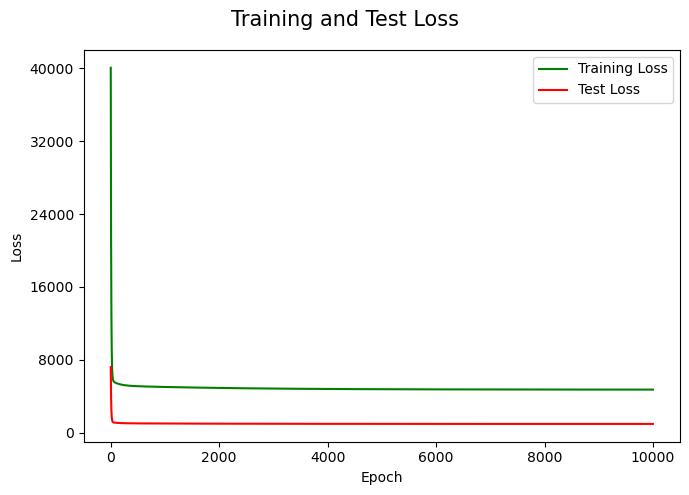

In [73]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(7, 5))
fig.suptitle('Training and Test Loss',fontsize = 15)

ax.plot(losses, color = "green", label = "Training Loss")

ax.plot(losses2, color = "red", label = "Test Loss")

plt.legend()

ax.set_xlabel("Epoch", fontsize = 10)
ax.set_ylabel("Loss", fontsize = 10)
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(6))
fig.tight_layout()

Now we can compare our test data to the predictions made by the NN model

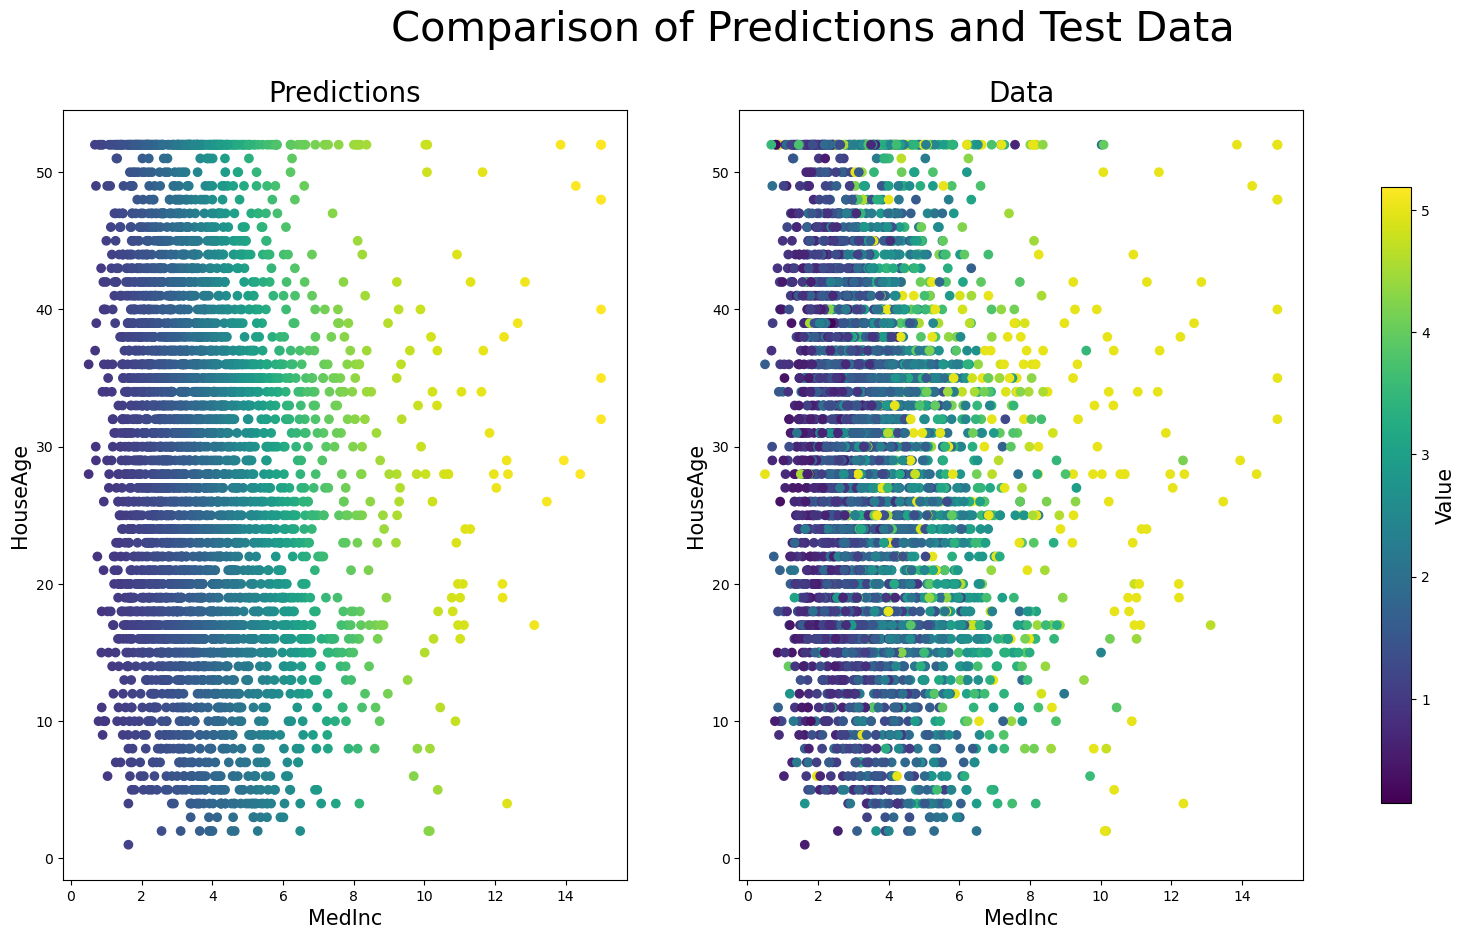

In [74]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.suptitle('Comparison of Predictions and Test Data', fontsize=30)

# Scale predictions back with the mean and std:
Y_pred = y_pred_test * Y_std + Y_mean

# Find global min and max values for the color scale
vmin = min(Y_pred.min(), Y_test.min())
vmax = max(Y_pred.max(), Y_test.max())

# Plot predictions with normalized color scale
scatter = axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_pred_test * Y_std + Y_mean, cmap='viridis', vmin=vmin, vmax=vmax)
axes[0].set_title('Predictions', fontsize=20)
axes[0].set_xlabel('MedInc', fontsize=15)
axes[0].set_ylabel('HouseAge', fontsize=15)

# Plot test data with normalized color scale
scatter = axes[1].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='viridis', vmin=vmin, vmax=vmax)
axes[1].set_title('Data', fontsize=20)
axes[1].set_xlabel('MedInc', fontsize=15)
axes[1].set_ylabel('HouseAge', fontsize=15)

# Add a single colorbar for both plots using the scatter plot
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', shrink=0.8, pad=0.05)
cbar.set_label('Value', fontsize=15)

plt.show()

We can also look at our predictions compared to the true test values:

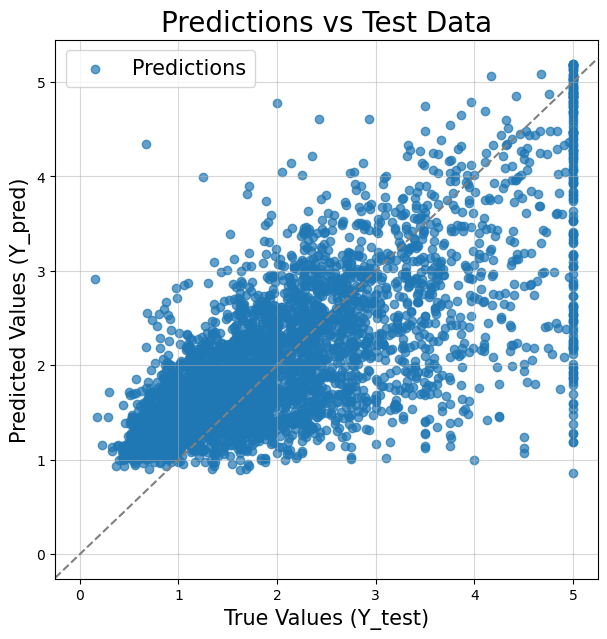

In [75]:
# Create a new figure for the predictions vs test data plot
plt.figure(figsize=(7, 7))
plt.title("Predictions vs Test Data", fontsize=20)

# Plot the predictions against the test data
plt.scatter(Y_test, Y_pred, alpha=0.7, label="Predictions")

plt.axline((0, 0), slope=1, color='grey', linestyle='--')

# Add labels and legend
plt.xlabel("True Values (Y_test)", fontsize=15)
plt.ylabel("Predicted Values (Y_pred)", fontsize=15)
plt.legend(fontsize=15)
plt.grid(alpha=0.5)

plt.show()


There is room for improvement, but we have learned the distribution!

### Task 3
Implement the network from Task 1 using PyTorch, an off-the-shelf machine learning library.

In [76]:
import torch

**Exercise** (5 minutes)
* Play around with the torch model by adjusting the number of epochs, learning rate, and also potentially the number of neurons in the hidden layer. Could also add layers in

In [85]:
# Initialise:

# Let's define some variables for the number of inputs and outputs.
N, D_in = x.shape
N, D_out = y.shape
H = 7 # The number of neurons in the hidden layer.

x_torch = torch.tensor(x, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32)

# Construct the model.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, D_out), 
    # Here is where you can add layers in
)

loss_fn = torch.nn.MSELoss(reduction='sum')

epochs = 20000
learning_rate = 1e-7

losses = np.empty(epochs)
losses2 = np.empty(epochs)


for t in range(epochs):
    # Forward pass.
    y_pred_torch = model(x_torch)
    
    # Compute loss.
    loss = loss_fn(y_pred_torch, y_torch)
    if t % 100 == 99:
        print(t, loss.item())
    losses[t] = loss.item()

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass.
    loss.backward()

    # Update the weights
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            
#     Run the forward pass on the test data:

    x_test_torch = torch.tensor(x_test, dtype=torch.float32)
    y_test_torch = torch.tensor(y_test, dtype=torch.float32)

    y_pred_test_torch = model(x_test_torch)
    # Compute loss.
    loss = loss_fn(y_pred_test_torch, y_test_torch)
    if t % 100 == 99:
        print(t, loss.item())
    losses2[t]=loss.item()
    
    

99 20596.833984375
99 4041.42724609375
199 19429.2421875
199 3823.33984375
299 18852.640625
299 3713.91455078125
399 18335.162109375
399 3614.341796875
499 17837.189453125
499 3518.185791015625
599 17353.96484375
599 3424.852783203125
699 16883.880859375
699 3334.11474609375
799 16426.1640625
799 3245.843994140625
899 15980.619140625
899 3160.00732421875
999 15547.4912109375
999 3076.65234375
1099 15127.3662109375
1099 2995.890380859375
1199 14721.05859375
1199 2917.87548828125
1299 14329.5244140625
1299 2842.788818359375
1399 13953.7705078125
1399 2770.82080078125
1499 13594.77734375
1499 2702.1552734375
1599 13253.4384765625
1599 2636.958740234375
1699 12930.5087890625
1699 2575.3701171875
1799 12626.5546875
1799 2517.49169921875
1899 12341.94921875
1899 2463.388671875
1999 12076.84375
1999 2413.082763671875
2099 11831.1796875
2099 2366.554931640625
2199 11604.68359375
2199 2323.744873046875
2299 11396.896484375
2299 2284.5576171875
2399 11207.19140625
2399 2248.86474609375
2499 1103

18899 9579.0771484375
18899 1957.4805908203125
18999 9578.5400390625
18999 1957.399169921875
19099 9578.0078125
19099 1957.3184814453125
19199 9577.4775390625
19199 1957.2386474609375
19299 9576.951171875
19299 1957.1588134765625
19399 9576.427734375
19399 1957.0794677734375
19499 9575.90625
19499 1957.0008544921875
19599 9575.388671875
19599 1956.9229736328125
19699 9574.8740234375
19699 1956.84521484375
19799 9574.36328125
19799 1956.76806640625
19899 9573.8544921875
19899 1956.691650390625
19999 9573.3505859375
19999 1956.6156005859375


Let's look at how the loss function converges:

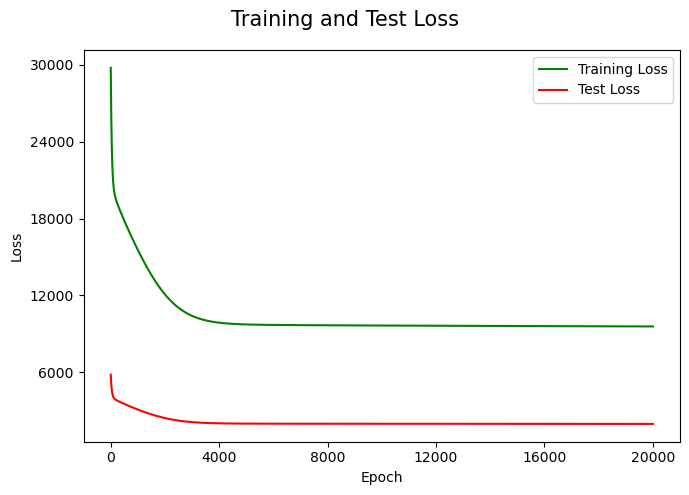

In [86]:
fig, ax = plt.subplots(figsize=(7,5))
fig.suptitle('Training and Test Loss',fontsize = 15)

ax.plot(losses, color = "green", label = "Training Loss")

ax.plot(losses2, color = "red", label = "Test Loss")

plt.legend()

ax.set_xlabel("Epoch", fontsize = 10)
ax.set_ylabel("Loss", fontsize = 10)
ax.xaxis.set_major_locator(MaxNLocator(6))
ax.yaxis.set_major_locator(MaxNLocator(6))
fig.tight_layout()

Let's look at how the predictions went at learning the underlying distribution

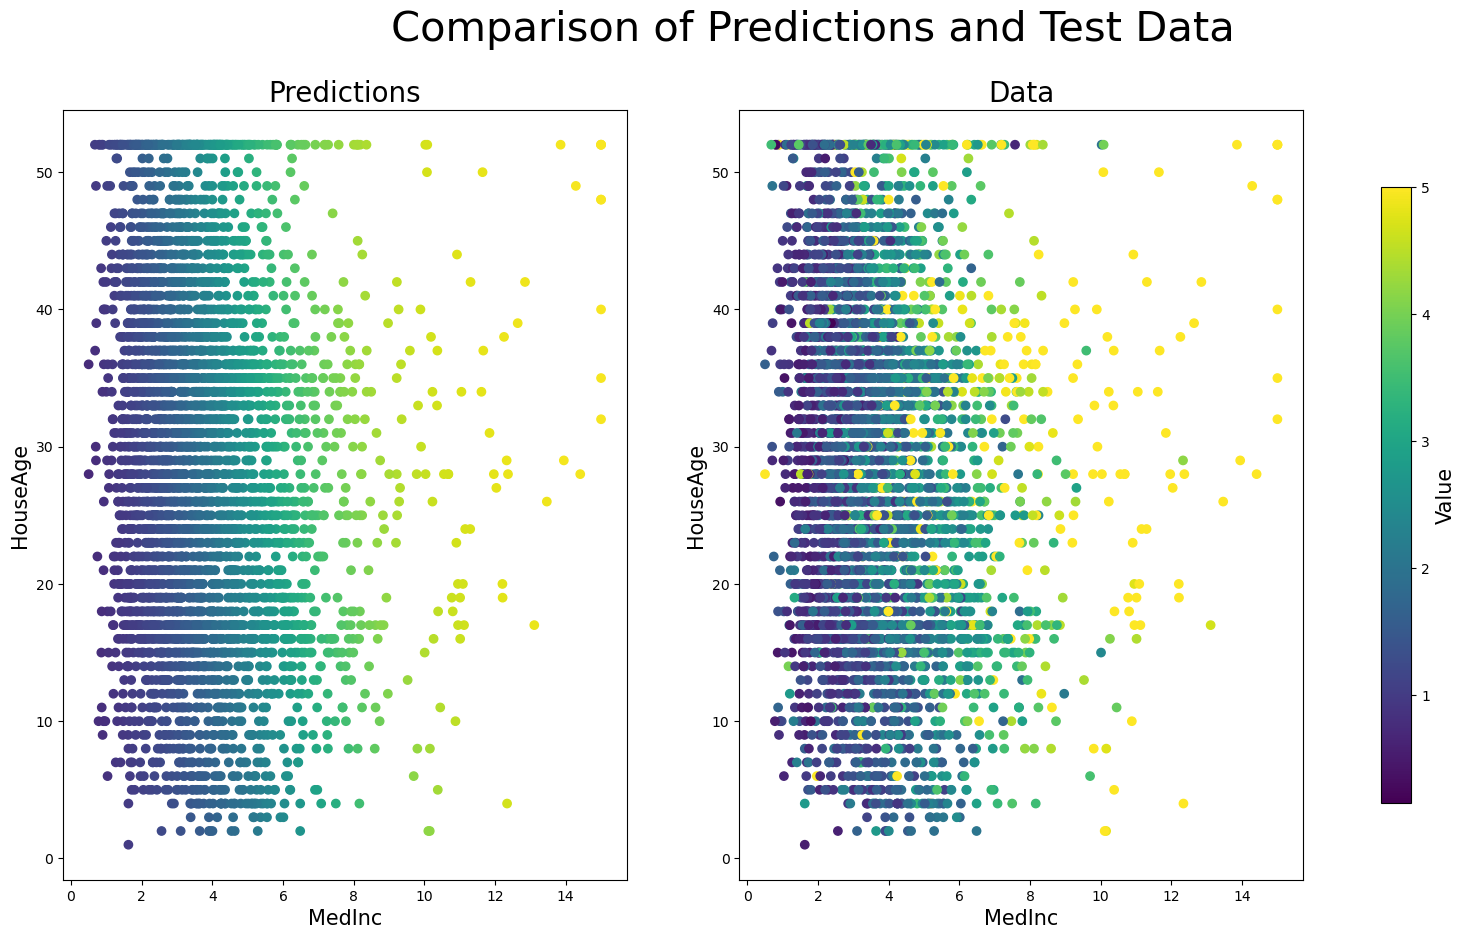

In [87]:
# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Comparison of Predictions and Test Data', fontsize=30)

Y_predictions = y_pred_test_torch.detach().numpy() * Y_std + Y_mean

# Find global min and max values for the color scale
vmin = min(Y_predictions.min(), Y_test.min())
vmax = max(Y_predictions.max(), Y_test.max())

# Plot predictions with normalized color scale
scatter = axes[0].scatter(X_test[:, 0], X_test[:, 1], c=Y_predictions, cmap='viridis', vmin=vmin, vmax=vmax)
axes[0].set_title('Predictions', fontsize=20)
axes[0].set_xlabel('MedInc', fontsize=15)
axes[0].set_ylabel('HouseAge', fontsize=15)

# Plot test data with normalized color scale
scatter = axes[1].scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap='viridis', vmin=vmin, vmax=vmax)
axes[1].set_title('Data', fontsize=20)
axes[1].set_xlabel('MedInc', fontsize=15)
axes[1].set_ylabel('HouseAge', fontsize=15)

# Add a single colorbar for both plots using the scatter plot
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', shrink=0.8, pad=0.05)
cbar.set_label('Value', fontsize=15)

plt.show()

Can look at the Torch predictions now compared to the truth information of the test data

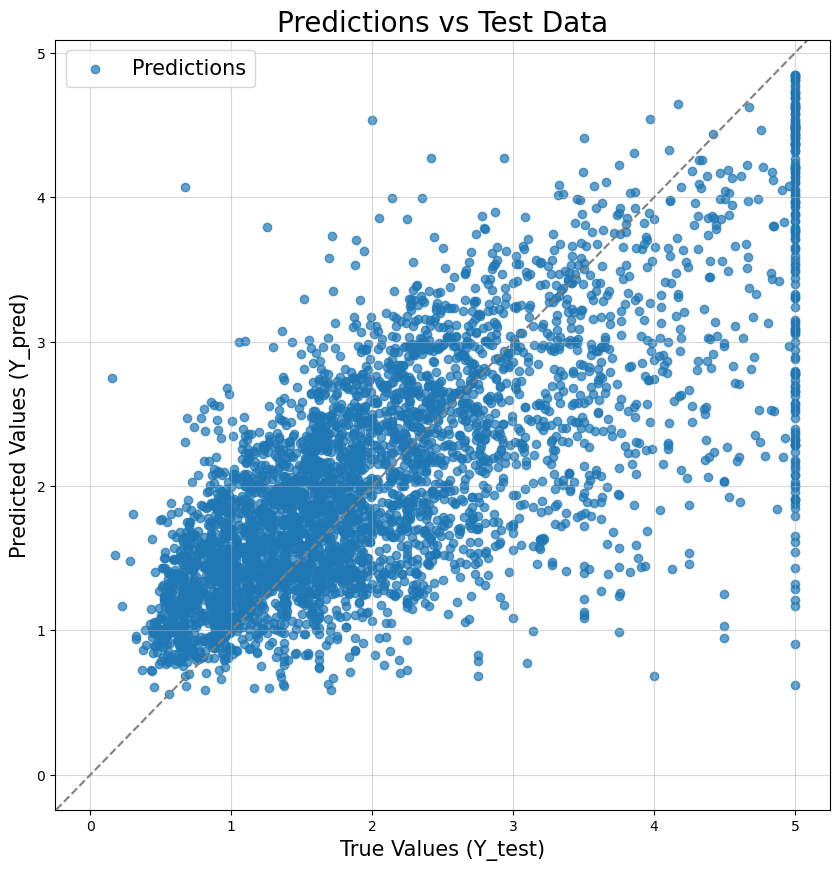

In [192]:
# Create a new figure for the predictions vs test data plot
plt.figure(figsize=(10, 10))
plt.title("Predictions vs Test Data", fontsize=20)

# Plot the predictions against the test data
plt.scatter(Y_test, y_pred_test.detach().numpy() * Y_std + Y_mean, alpha=0.7, label="Predictions")

plt.axline((0, 0), slope=1, color='grey', linestyle='--')

# Add labels and legend
plt.xlabel("True Values (Y_test)", fontsize=15)
plt.ylabel("Predicted Values (Y_pred)", fontsize=15)
plt.legend(fontsize=15)
plt.grid(alpha=0.5)

plt.show()